## **Tic-Tac-Toe Classification by Multiple NN and Keras**

##Read file and import library

In [1]:
# for coloab only
from google.colab import drive
drive.mount('/content/gdrive')
root_dir = '/content/gdrive/My Drive/CE - ML &Deep Learning/Deep Learning/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # predefined plotting style

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

# If you are on CoLab, copy tic-tac-toe.csv to the default dir '/content' before running this code.
# Download tic-tac-toe.csv: https://drive.google.com/file/d/1WD4ibv0qqWpP4QoNpBAztx2fNylmZWyv/view?usp=sharing
file_name = root_dir + 'tic-tac-toe.csv' 
# Import dataset
dataset = pd.read_csv(file_name, names = '1 2 3 4 5 6 7 8 9 class'.split())
X = dataset.iloc[:, 0:9].values
y = dataset.iloc[:, 9:10].values

Using TensorFlow backend.


In [3]:
dataset

,1,2,3,4,5,6,7,8,9,class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative


##LabelEncoder

In [4]:
# Encode categorical variables as numeric
labelencoder_X = LabelEncoder()
for i in range(9):
    X[:, i] = labelencoder_X.fit_transform(X[:, i])
print(X[0])

# Encode target categorical variable
labelencoder_y = LabelEncoder()
y[:, 0] = labelencoder_y.fit_transform(y[:, 0])
print(y[0])

[2 2 2 2 1 1 2 1 1]
[1]


##Split data

In [0]:
# Train/test split
# !!! DO NOT change test_size, random_state and stratify !!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
num_class_label = np.unique(np.array(y_train), return_counts=True)
print('Train shape: ', X_train.shape)
print('class label 0 : ', num_class_label[1][0])
print('class label 1 : ', num_class_label[1][1])

print('\n======================================================\n')

num_class_label = np.unique(np.array(y_test), return_counts=True)
print('Test shape: ', X_test.shape)
print('class label 0 : ', num_class_label[1][0])
print('class label 1 : ', num_class_label[1][1])

Train shape:  (766, 9)
class label 0 :  265
class label 1 :  501


Test shape:  (192, 9)
class label 0 :  67
class label 1 :  125


##Init neural network architecture

In [7]:
# Initialize neural network
nnet = Sequential()

# Add first hidden layer (and input layer)
nnet.add(Dense(units=100, kernel_initializer='uniform', activation='relu', input_dim=9, use_bias=True))

# Add second hidden layer
nnet.add(Dense(units=100, kernel_initializer='uniform', activation='relu', use_bias=True))

# Add output layer
nnet.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid', use_bias=True))

# Compile network
from keras import optimizers
optimizer = optimizers.SGD(lr=0.06, decay=1e-6, momentum=0.9, nesterov=True)
nnet.compile(optimizer=optimizer , loss='binary_crossentropy', metrics=['accuracy'])
nnet.summary()






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1000      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 11,201
Trainable params: 11,201
Non-trainable params: 0
_________________________________________________________________


In [8]:
from keras.callbacks import TensorBoard
history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

history_callback = nnet.fit(X_train, y_train, batch_size=10, epochs=100, verbose=1, callbacks=[cb])











Epoch 1/100
766/766 [==============================] - 1s 899us/step - loss: 0.6509 - acc: 0.6501

Epoch 2/100
766/766 [==============================] - 0s 368us/step - loss: 0.6383 - acc: 0.6540
Epoch 3/100
766/766 [==============================] - 0s 371us/step - loss: 0.6366 - acc: 0.6645
Epoch 4/100
766/766 [==============================] - 0s 376us/step - loss: 0.6169 - acc: 0.6802
Epoch 5/100
766/766 [==============================] - 0s 400us/step - loss: 0.5976 - acc: 0.6971
Epoch 6/100
766/766 [==============================] - 0s 417us/step - loss: 0.5632 - acc: 0.7454
Epoch 7/100
766/766 [==============================] - 0s 378us/step - loss: 0.5485 - acc: 0.7337
Epoch 8/100
766/766 [==============================] - 0s 396us/step - loss: 0.5161 - acc: 0.7598
Epoch 9/100
766/766 [==============================] - 0s 388us/step - loss: 0.4833 - acc: 0.7768
Epoch 10/100
766/766 [==============================] - 0s 385us/step - loss: 0.5005 - acc: 0.7676
Epoch 11

## Training accuracy and Training Loss Graph 

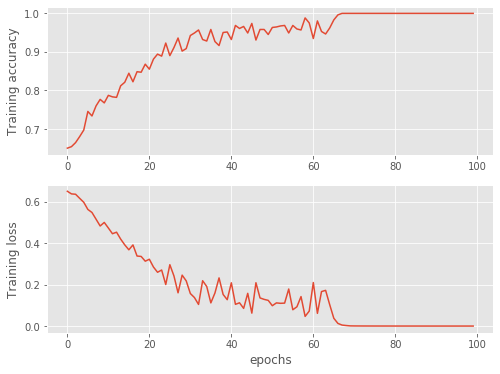

In [9]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

acc = history_callback.history['acc']
loss = history_callback.history['loss']
ax1.plot(acc, label=nnet)
ax2.plot(loss, label=nnet)
    
ax1.set_ylabel('Training accuracy')
ax2.set_ylabel('Training loss')
ax2.set_xlabel('epochs')
#ax1.legend()
#ax2.legend()
plt.show()

In [10]:
score = nnet.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Predicting the test set results
y_pred = nnet.predict(X_test)

192/192 [==============================] - 0s 258us/step
Test loss: 0.05426451741853574
Test accuracy: 0.9791666666666666


##Average test accuracy rate in 10 times

In [11]:
scores = []
for i in range(10):
  nnet = Sequential()
  nnet.add(Dense(units=100, kernel_initializer='uniform', activation='relu', input_dim=9, use_bias=True))
  nnet.add(Dense(units=100, kernel_initializer='uniform', activation='relu', use_bias=True))
  nnet.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid', use_bias=True))
  nnet.compile(optimizer=optimizers.SGD(lr=0.06, decay=1e-6, momentum=0.9, nesterov=True) , loss='binary_crossentropy', metrics=['accuracy'])
  nnet.fit(X_train, y_train, batch_size=10, epochs=100, verbose=1)

  score = nnet.evaluate(X_test, y_test, verbose=1)
  print('Test loss ', i, ' : ', score[0])
  print('Test accuracy', i, ' : ', score[1])
  scores.append(score[1])
print('Max accuracy rate :', np.array(scores).max())
print('Min accuracy rate :', np.array(scores).min())

Epoch 1/100
766/766 [==============================] - 0s 644us/step - loss: 0.6538 - acc: 0.6527
Epoch 2/100
766/766 [==============================] - 0s 396us/step - loss: 0.6441 - acc: 0.6540
Epoch 3/100
766/766 [==============================] - 0s 426us/step - loss: 0.6312 - acc: 0.6514
Epoch 4/100
766/766 [==============================] - 0s 376us/step - loss: 0.6152 - acc: 0.6671
Epoch 5/100
766/766 [==============================] - 0s 393us/step - loss: 0.5905 - acc: 0.7063
Epoch 6/100
766/766 [==============================] - 0s 379us/step - loss: 0.5699 - acc: 0.7206
Epoch 7/100
766/766 [==============================] - 0s 402us/step - loss: 0.5371 - acc: 0.7402
Epoch 8/100
766/766 [==============================] - 0s 419us/step - loss: 0.5362 - acc: 0.7324
Epoch 9/100
766/766 [==============================] - 0s 389us/step - loss: 0.5072 - acc: 0.7663
Epoch 10/100
766/766 [==============================] - 0s 386us/step - loss: 0.4803 - acc: 0.7846
Epoch 11/100
766/76